# Project Title : Personalized Music Recommendations Using Listening History

### Importing Libraries

In [166]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
#for font adjustment
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['Microsoft YaHei']
rcParams['axes.unicode_minus'] = False


### Reading db file and connecting it to database

In [167]:
#reading db file 
db_path =r"C:\Users\jaswa\OneDrive\Desktop\lastfm-dataset-50-extended-normalized.db"

# Connect to the database
conn = sqlite3.connect(db_path)

# List all tables in the database
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables:\n", tables)

Tables:
       name
0    users
1  artists
2   albums
3   tracks
4  listens


### selection of database tables and displays their schema

In [168]:

# Assuming table_names is already defined
table_dropdown = widgets.Dropdown(
    options=table_names,
    description='Select Table:'
)

output = widgets.Output()

def display_table_schema(table_name):
    with output:
        output.clear_output(wait=True)  # Clear only the output area, not the whole cell
        cursor = conn.cursor()
        cursor.execute(f'PRAGMA table_info("{table_name}");')
        schema = cursor.fetchall()
        
        print(f"Schema for table '{table_name}':")
        print("Column ID | Name       | Type     | Not Null | Default | Primary Key")
        print("-" * 60)
        for col in schema:
            print(f"{col[0]:8} | {col[1]:10} | {col[2]:8} | {col[3]:8} | {str(col[4]):7} | {col}")

def on_table_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        display_table_schema(change['new'])

table_dropdown.observe(on_table_change)

# Initial display
display(table_dropdown, output)
display_table_schema(table_dropdown.value)


Dropdown(description='Select Table:', options=('users', 'artists', 'albums', 'tracks', 'listens'), value='user…

Output()

In [169]:
pd.set_option('display.max_columns', 8)    # Limit to 6 columns in output
pd.set_option('display.width', 150)        # Adjust total table width

### TOP 5 values for each Table (just for the basic idea of Tables)

In [170]:
# 1. users table
df1 = pd.read_sql_query(f"SELECT * FROM users LIMIT 5;", conn)
print(df1.head())

   id         name
0   1  user_000001
1   2  user_000021
2   3  user_000041
3   4  user_000061
4   5  user_000081


In [171]:
# 2. artists table
df2 = pd.read_sql_query(f"SELECT * FROM artists LIMIT 5;", conn)
print(df2.head())

   id                                  mbid               name
0   1  09a114d9-7723-4e14-b524-379697f6d2b5  Plaid & Bob Jaroc
1   2  67fb65b5-6589-47f0-9371-8a40eb268dfb     Tommy Guerrero
2   3  1cfbc7d1-299c-46e6-ba4c-1facb84ba435      Artful Dodger
3   4  6b77d8ef-c405-4846-9d5f-2b93e6533101       Rei Harakami
4   5  27613b78-1b9d-4ec3-9db5-fa0743465fdd     Herbie Hancock


In [172]:
# 3.albums table
df3 = pd.read_sql_query(f"SELECT * FROM albums LIMIT 5;", conn)
print(df3.head())

   id                                  mbid                          title artist_id
0   1  b5d8192f-6924-4e2c-952b-b10b69eb2cfa                    Greedy Baby         1
1   2  3fd45ff2-061c-4b3d-87a8-c946c878ecc1      From the Soil to the Soul         2
2   3  155abbf5-1123-4f92-b64e-526e3e3b85b9  It’s All About the Stragglers         3
3   4  2ab57484-2483-45e6-90bb-031373fe818a                           Lust         4
4   5  5bb9f050-9ec5-4219-a504-68aed2586b9e                Future 2 Future         5


In [173]:
# 4. tracks table
df4 = pd.read_sql_query(f"SELECT * FROM tracks LIMIT 5;", conn)
print(df4.head())

   id  artist_id                                  mbid                                     title  album_id  length  tracknumber
0   1          1  c4633ab1-e715-477f-8685-afa5f2058e42                 The Launching Of Big Face         1  254173            3
1   2          1  bc2765af-208c-44c5-b3b0-cf597a646660                                   Zn Zero         1  438640            4
2   3          1  aa9c5a80-5cbe-42aa-a966-eb3cfa37d832  The Return Of Super Barrio - End Credits         1   88506            6
3   4          2  d9b1c1da-7e47-4f97-a135-77260f2f559d                             Mission Flats         2   89986            8
4   5          3  120bb01c-03e4-465f-94a0-dce5e9fac711                        What You Gonna Do?         3  240066           11


In [174]:
# 5. listens table
df5 = pd.read_sql_query(f"SELECT * FROM listens LIMIT 5;", conn)
print(df5.head())

   user_id                  timestamp  track_id
0        1  2006-08-13 13:59:20+00:00         1
1        1  2006-08-13 14:03:29+00:00         2
2        1  2006-08-13 14:10:43+00:00         3
3        1  2006-08-13 14:17:40+00:00         4
4        1  2006-08-13 14:19:06+00:00         5


# Purpose : Combines listening logs with song, artist, album, and user details in a single DataFrame.

## For each listening event, includes:
### 1. user ID and name
### 2. time played
### 3. track ID and title
### 4. artist name
### 5. album title

## Result : Enables rich, human-readable analysis and personalized recommendations using all related metadata.

In [175]:
query = '''
SELECT l.user_id, l.timestamp, t.title AS track_title, a.name AS artist_name, t.length
FROM listens l
LEFT JOIN tracks t ON l.track_id = t.id
LEFT JOIN artists a ON t.artist_id = a.id
'''
df_listen = pd.read_sql_query(query, conn)
print(df_listen.head(10))


   user_id                  timestamp                               track_title        artist_name    length
0        1  2006-08-13 13:59:20+00:00                 The Launching Of Big Face  Plaid & Bob Jaroc  254173.0
1        1  2006-08-13 14:03:29+00:00                                   Zn Zero  Plaid & Bob Jaroc  438640.0
2        1  2006-08-13 14:10:43+00:00  The Return Of Super Barrio - End Credits  Plaid & Bob Jaroc   88506.0
3        1  2006-08-13 14:17:40+00:00                             Mission Flats     Tommy Guerrero   89986.0
4        1  2006-08-13 14:19:06+00:00                        What You Gonna Do?      Artful Dodger  240066.0
5        1  2006-08-13 14:23:03+00:00                                       Joy       Rei Harakami  600226.0
6        1  2006-08-13 14:44:23+00:00                                      Lust       Rei Harakami  300773.0
7        1  2006-08-13 14:55:14+00:00                               The Essence     Herbie Hancock  294026.0
8        1  2006-08

### Purpose: Enables grouping, filtering, or analyzing user listening behavior by hour of day.

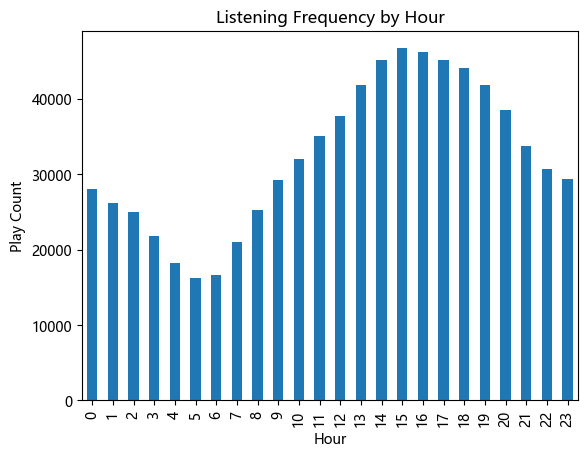

In [176]:
# Listening counts per hour of all users
df_listen['hour'] = pd.to_datetime(df_listen['timestamp']).dt.hour
df_listen['hour'].value_counts().sort_index().plot(kind='bar')
plt.title('Listening Frequency by Hour')
plt.xlabel('Hour')
plt.ylabel('Play Count')
plt.show()


## creating a profile for a specific user

### Purpose 1: Focuses analysis and visualizations on a single user’s behavior for personalized insights
### Purpose 2: Measures how active and diverse the user’s musical taste is.

In [177]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Select a user_id (replace with an actual user_id from your dataset)
user_id = 1  # Example: 1

df_listen['hour'] = pd.to_datetime(df_listen['timestamp']).dt.hour

# Filter for this user
user_df = df_listen[df_listen['user_id'] == user_id]

# Q1: Total tracks listened to
total_tracks = user_df.shape[0]

# Q2: Unique artists
unique_artists = user_df['artist_name'].nunique()

# Q3: Top 3 artists
top_artists = user_df['artist_name'].value_counts().head(4)

# Q4: Top 3 tracks
top_tracks = user_df['track_title'].value_counts().head(3)

# Q5: Most frequent listening hour(s)
most_hours = user_df['hour'].value_counts().head(3)

# Q6: Average length (in seconds)
avg_length_sec = (user_df['length'] / 1000).mean()

print(f"User Profile for User ID {user_id}:\n")
print(f"Total tracks listened: {total_tracks}")
print(f"Unique artists listened to: {unique_artists}")
print("Top 3 artists:")
print(top_artists)
print("\nTop 3 tracks:")
print(top_tracks)
print("\nMost frequent listening hour(s):")
print(most_hours)
print(f"\nAverage song length: {avg_length_sec:.2f} seconds ({avg_length_sec/60:.2f} minutes)")

User Profile for User ID 1:

Total tracks listened: 16685
Unique artists listened to: 488
Top 3 artists:
artist_name
Underworld    747
Cornelius     518
Plaid         444
坂本龍一          441
Name: count, dtype: int64

Top 3 tracks:
track_title
Music         70
Gum           63
Child Song    45
Name: count, dtype: int64

Most frequent listening hour(s):
hour
13    3821
14    3408
15    2471
Name: count, dtype: int64

Average song length: 290.84 seconds (4.85 minutes)


### Purpose: Visualizes when (what hour) the user is most musically active—informing time-aware recommendations.

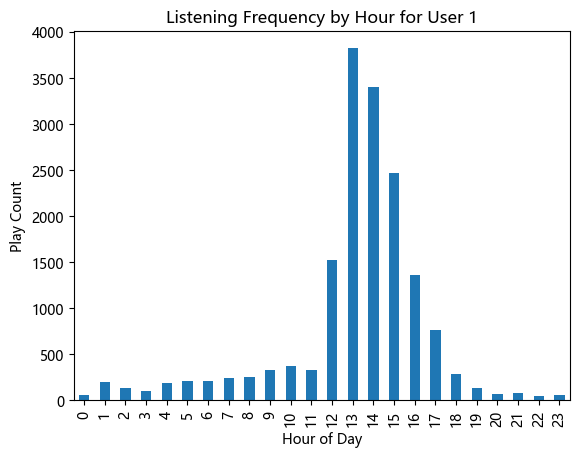

In [178]:
# visualize listening pattern by hour for a users
user_df['hour'].value_counts().sort_index().plot(kind='bar')
plt.title(f'Listening Frequency by Hour for User {user_id}')
plt.xlabel('Hour of Day')
plt.ylabel('Play Count')
plt.show()

### Purpose: Illustrates whether the user listens to a diverse set of artists or repeats a few favorites.

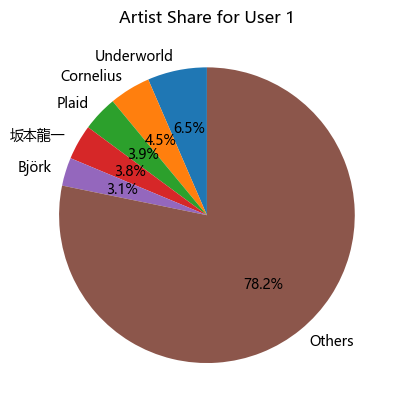

In [179]:
# Pie chart for top 5 artists' share + 'others'
artist_counts = user_df['artist_name'].value_counts()
top5 = artist_counts.head(5)
others = artist_counts[5:].sum()

# Use pd.concat instead of append
pie_data = pd.concat([top5, pd.Series({'Others': others})])

pie_data.plot(kind='pie', autopct='%.1f%%', startangle=90)
plt.ylabel("")
plt.title(f"Artist Share for User {user_id}")
plt.show()


## FOR RECOMMENDATION

### Purpose Fx(1): Finds the artist the user plays most, and explains why they are being recommended.
### Purpose Fx(2): Uses user's listening peaks to suggest tracks that match their time-of-day preferences.
### Purpose Fx(3): Promotes more diverse listening or affirms their existing range.

In [180]:
def recommend_top_artist(user_df):
    top_artist = user_df['artist_name'].value_counts().idxmax()
    return f"We recommend {top_artist} because you listen to them most frequently."

def recommend_peak_hour_track(user_df):
    peak_hour = user_df['hour'].value_counts().idxmax()
    top_tracks_at_peak = user_df[user_df['hour'] == peak_hour]['track_title'].value_counts()
    track = top_tracks_at_peak.idxmax()
    return f"At your favorite hour ({peak_hour}:00), you love {track}—try it again!"

def recommend_diverse_artist(user_df):
    # Find artists listened to only once or infrequently
    artist_counts = user_df['artist_name'].value_counts()
    lesser_played = artist_counts[(artist_counts == 1)| (artist_counts == 2)].index
    if len(lesser_played):
        return f"Mix it up with {lesser_played[0]} for more variety!"
    return "You're already listening to a great mix of artists!"


In [181]:
print(recommend_top_artist(user_df))
print(recommend_peak_hour_track(user_df))
print(recommend_diverse_artist(user_df))


We recommend Underworld because you listen to them most frequently.
At your favorite hour (13:00), you love Music—try it again!
Mix it up with Jonny Greenwood for more variety!


### Purpose Fx(3): Recommend tracks the user played frequently in the recent_days but excludes those listened to very recently,                encouraging replay of recent favorites without immediate repetition.

In [182]:
def recommend_recently_loved(user_df, recent_days=30, top_n=5):
  
    user_df = user_df.copy()
    user_df['timestamp'] = pd.to_datetime(user_df['timestamp'])

    # Define cutoff dates
    max_date = user_df['timestamp'].max()
    recent_cutoff = max_date - pd.Timedelta(days=recent_days)
    very_recent_cutoff = max_date - pd.Timedelta(days=3)  # Avoid songs listened to in last 3 days
    
    # Filter listens within recent_days (but NOT very recent)
    recent_listens = user_df[(user_df['timestamp'] >= recent_cutoff) & (user_df['timestamp'] < very_recent_cutoff)]
    
    # Find top tracks in that period
    top_tracks = recent_listens['track_title'].value_counts().head(top_n)
    
    return list(top_tracks.index)


In [183]:
recommendations = recommend_recently_loved(user_df, recent_days=30, top_n=5)
print("Recency-based recommendations:", recommendations)

Recency-based recommendations: ['Tibetan Dance (Version)', 'The Last Emperor (Theme)', 'Merry Christmas Mr. Lawrence (Theme) (Live)', "He Doesn'T Know Why", 'Heard Them Stirring']


## Purpose: Clear, user-facing summary—connects data patterns to actionable recommendations.

In [184]:
print(f"""
User {user_id} Profile Summary:

- Total tracks played: {total_tracks}
- Unique artists: {unique_artists}
- Most active listening hour: {most_hours}:00
- Top 4 Artists: {', '.join(top_artists.index)}
- Top 3 Tracks: {', '.join(top_tracks.index)}
- They listen mainly during: {', '.join(str(h) + ':00' for h in most_hours.index)}
- Avg. song length: {avg_length_sec/60:.2f} min

Based on this, we’d recommend more music from {top_artists.index[0]} or {top_tracks.index[1]} during your peak music listening hour.
""")



User 1 Profile Summary:

- Total tracks played: 16685
- Unique artists: 488
- Most active listening hour: hour
13    3821
14    3408
15    2471
Name: count, dtype: int64:00
- Top 4 Artists: Underworld, Cornelius, Plaid, 坂本龍一
- Top 3 Tracks: Music, Gum, Child Song
- They listen mainly during: 13:00, 14:00, 15:00
- Avg. song length: 4.85 min

Based on this, we’d recommend more music from Underworld or Gum during your peak music listening hour.



In [185]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

user_ids = df_listen['user_id'].unique().tolist()

user_dropdown = widgets.Dropdown(
    options=user_ids,
    description='Select User:',
    value=user_ids[0],
    disabled=False,
)

output = widgets.Output()

def display_user_profile(user_id):
    with output:
        clear_output(wait=True)
        
        user_df = df_listen[df_listen['user_id'] == user_id].copy()
        user_df['timestamp'] = pd.to_datetime(user_df['timestamp'])
        user_df['hour'] = user_df['timestamp'].dt.hour
        
        total_tracks = user_df.shape[0]
        unique_artists = user_df['artist_name'].nunique()
        top_artists = user_df['artist_name'].value_counts().head(3)
        top_tracks = user_df['track_title'].value_counts().head(3)
        most_hours = user_df['hour'].value_counts().head(3)
        avg_length_sec = (user_df['length'] / 1000).mean()
        
        print(f"User Profile for User ID {user_id}:\n")
        print(f"Total tracks listened: {total_tracks}")
        print(f"Unique artists listened to: {unique_artists}")
        print("Top 3 artists:")
        print(top_artists)
        print("\nTop 3 tracks:")
        print(top_tracks)
        print("\nMost frequent listening hour(s):")
        print(most_hours)
        print(f"\nAverage song length: {avg_length_sec:.2f} seconds ({avg_length_sec/60:.2f} minutes)")
        
        user_df['hour'].value_counts().sort_index().plot(kind='bar')
        plt.title(f'Listening Frequency by Hour for User {user_id}')
        plt.xlabel('Hour of Day')
        plt.ylabel('Play Count')
        plt.show()
        
        recs = recommend_recently_loved(user_df)
        print("Recency-based Recommendations:")
        for i, rec in enumerate(recs, 1):
            print(f"{i}. {rec}")

def on_user_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        display_user_profile(change['new'])

user_dropdown.observe(on_user_change)

# Initial display
display(user_dropdown, output)
display_user_profile(user_dropdown.value)


Dropdown(description='Select User:', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 1…

Output()

In [164]:
# Close the connection
conn.close() 